In [1]:
import pandas as pd

df = pd.read_excel("./base_de_donnees_c.xlsx") 

# Statsitiques sur la longueur du texte dans chaque catégorie

In [2]:
source_counts = df['Source'].value_counts()

df['text_length'] = df['Contenu'].str.len()
avg_text_length = df.groupby('Source')['text_length'].mean()

print("Nombre de documents par source :\n", source_counts)
print("\nLongueur moyenne du texte par source :\n", avg_text_length)

Nombre de documents par source :
 Code de la construction et de l'habitation                                                              2628
Règlement de sécurité contre les risques d'incendie et de panique. Etablissements recevant du public    1161
Etablissement recevant des travailleurs                                                                  299
Réglementation sécurité et incendie. Etablissement recevant du public                                     44
Name: Source, dtype: int64

Longueur moyenne du texte par source :
 Source
Code de la construction et de l'habitation                                                               848.070015
Etablissement recevant des travailleurs                                                                  347.177258
Règlement de sécurité contre les risques d'incendie et de panique. Etablissements recevant du public    1075.723514
Réglementation sécurité et incendie. Etablissement recevant du public                                   456

# Un WordCloud pour chaque catégorie

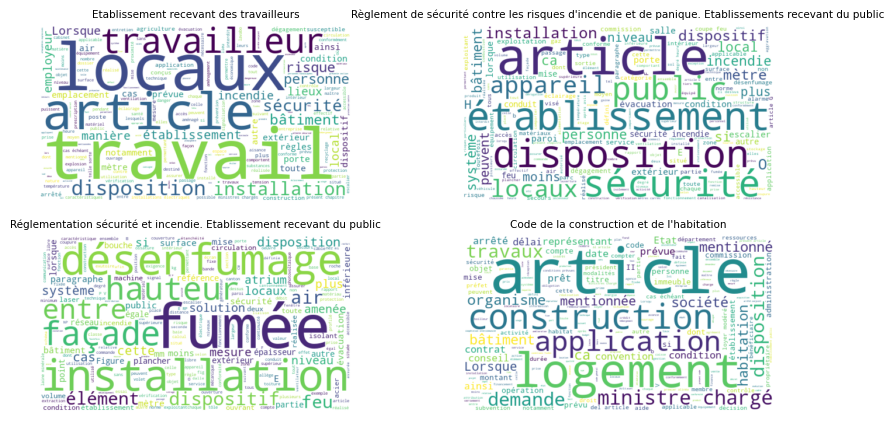

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# nltk.download('punkt')
# nltk.download('stopwords')
fr_stopwords = stopwords.words('french')
fr_stopwords.extend(['être', 'doivent', 'doit', 'r', 'i', 'a', 'peut', '1°'])

fig, ax = plt.subplots(figsize=(10, 5), ncols=2, nrows=2)
for i, item in enumerate(df.Source.unique()):
    text = ' '.join(df.loc[df['Source'] == item, 'Contenu'].dropna())
    wordcloud = WordCloud(stopwords=set(fr_stopwords), width=532, height=300, background_color='white').generate(text)
    ax[i%2, i//2].imshow(wordcloud, interpolation='bilinear')
    ax[i%2, i//2].axis('off')
    ax[i%2, i//2].set_title(item, fontsize=7.5)
plt.show()


# Fréquence des mots

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nedved\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


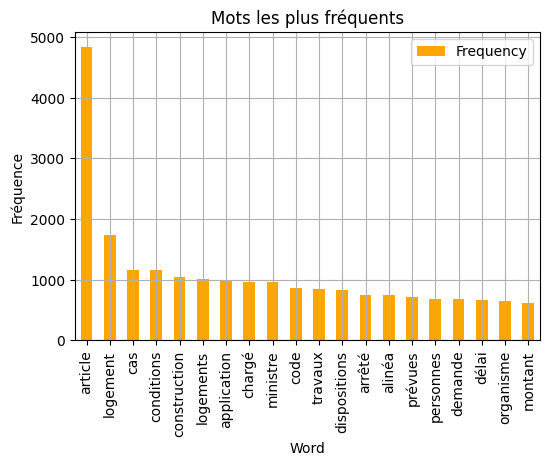

In [34]:
from collections import Counter
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')

all_text = ' '.join(df.loc[:, 'Contenu'].dropna())

words = word_tokenize(text, language='french')
filtered_words = [word for word in words if (word.lower().strip() not in fr_stopwords) and (word not in string.punctuation)]
word_freq = Counter(filtered_words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

word_freq_df.head(20).plot(kind='bar', x='Word', y='Frequency', figsize=(6, 4), color='orange')
plt.title("Mots les plus fréquents")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

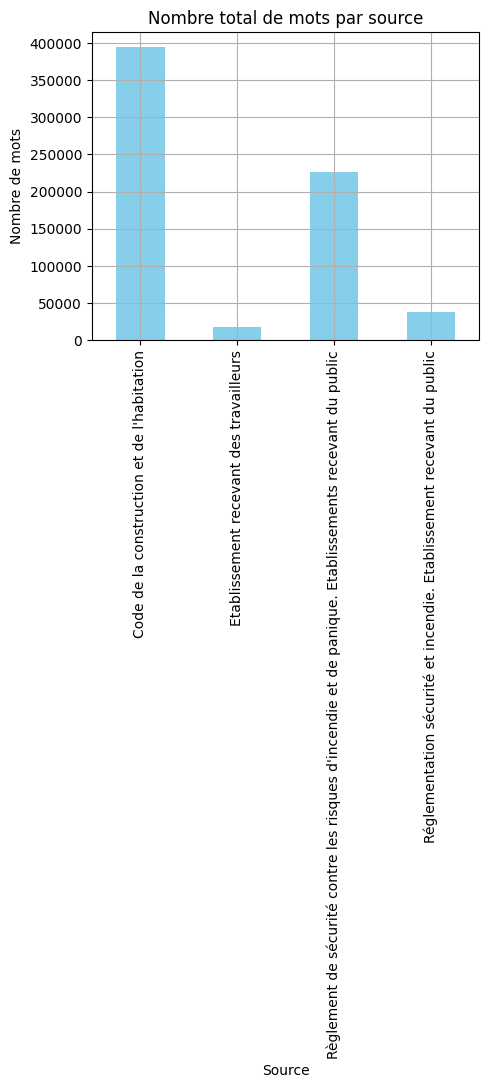

In [36]:
df['Nbre_mots'] = df['Contenu'].apply(lambda x: len(word_tokenize(x, language='french')))

df.groupby('Source')['Nbre_mots'].sum().plot(kind='bar', figsize=(5, 4), color='skyblue')
plt.title("Nombre total de mots par source")
plt.ylabel("Nombre de mots")
plt.xlabel("Source")
plt.grid()
plt.show()

In [37]:
df['word_count'] = df['Contenu'].apply(lambda x: len(word_tokenize(x, language='french')))
df.groupby('Source')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Source,,,,,,,,
Code de la construction et de l'habitation,2628.0,150.239346,167.792436,2.0,56.0,100.0,184.00,2658.0
Etablissement recevant des travailleurs,299.0,59.294314,41.361319,13.0,31.5,49.0,75.00,285.0
Règlement de sécurité contre les risques d'incendie et de panique. Etablissements recevant du public,1161.0,194.420327,231.705228,10.0,65.0,120.0,237.00,3660.0
Réglementation sécurité et incendie. Etablissement recevant du public,44.0,855.795455,1303.304290,21.0,131.0,303.5,842.75,5929.0


In [38]:
df.groupby('Source')['word_count'].sum()

Source
Code de la construction et de l'habitation                                                              394829
Etablissement recevant des travailleurs                                                                  17729
Règlement de sécurité contre les risques d'incendie et de panique. Etablissements recevant du public    225722
Réglementation sécurité et incendie. Etablissement recevant du public                                    37655
Name: word_count, dtype: int64

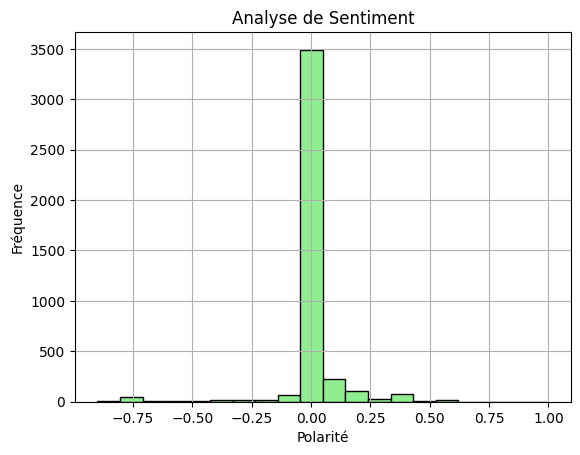

In [39]:
from textblob import TextBlob

df['sentiment'] = df['Contenu'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['sentiment'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Analyse de Sentiment')
plt.xlabel('Polarité')
plt.ylabel('Fréquence')
plt.show()


In [40]:
df_ = df.loc[df['sentiment']==df['sentiment'].max(), ['Contenu', 'sentiment']]
df_
print(f'Sentiment positif: {df_.iloc[0, 1]}')
print(df_.iloc[0, 0])

df_ = df.loc[df['sentiment']==df['sentiment'].min(), ['Contenu', 'sentiment']]
df_
print(f'Sentiment négatif: {df_.iloc[0, 1]}')
print(df_.iloc[0, 0])

Sentiment positif: 1.0
Compartiments§ 1. Le compartiment prévu à l article C O 1 (§ 2) est un volume à l intérieur duquel les exigences de résistance au feu relatives aux parois verticales définies à l article C O 24 (§ 1) ne sont pas imposées.§ 2. Lorsqu ils sont autorisés par les dispositions particulières à certains types d établissements, les compartiments doivent avoir les caractéristiques suivantes :a) Dimensions : chaque niveau comporte au moins deux compartiments dont chacun a une capacité d accueil du même ordre de grandeur.Un compartiment peut s étendre sur deux niveaux si la superficie totale ne dépasse pas la superficie moyenne d un compartiment de l établissement.La surface maximale ou l effectif maximal admissible est fixé dans les dispositions particulières au type d établissement intéressé ;b) Parois : les parois verticales limitant les compartiments, façades exclues, ont les qualités de résistance au feu suivantes :D EG RÉ D E S TA BI LI TÉ A U F EUexigé pour la struct